In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Mean

In [4]:
df['fare'].mean()

np.float64(32.204207968574636)

In [5]:
stats.gmean(df['fare'])

np.float64(0.0)

In [6]:
data = np.array([10,15,20,25,30])
stats.gmean(data)

np.float64(18.639596365956756)

In [7]:
stats.hmean(data)

np.float64(17.24137931034483)

In [8]:
data.mean()

np.float64(20.0)

In [9]:
stats.trim_mean(data,0.1)

np.float64(20.0)

## Median

In [10]:
df['fare'].median()

np.float64(14.4542)

In [11]:
df['age'].median()

np.float64(28.0)

## Mode

In [12]:
df['fare'].mode()

0    8.05
Name: fare, dtype: float64

In [13]:
df['class'].mode()

0    Third
Name: class, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

## Range

In [14]:
df1 = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
np.ptp(df1)

np.int64(14)

In [15]:
np.ptp(df['age'])

np.float64(nan)

In [16]:
np.ptp(df['fare'])

np.float64(512.3292)

## IQR

In [17]:
Q1 = np.percentile(df['fare'], 25)
Q3 = np.percentile(df['fare'], 75)

IQR = Q3 - Q1

lower_bond = Q1-1.5*IQR
upper_bond = Q3+1.5*IQR

outlier = (df['fare'] < lower_bond)|(df['fare'] > upper_bond)

df_no_outlier = df[~outlier]

print("Data with outliers : ",outlier.sum())
print("Data with no outliers : ",len(df_no_outlier))

Data with outliers :  116
Data with no outliers :  775


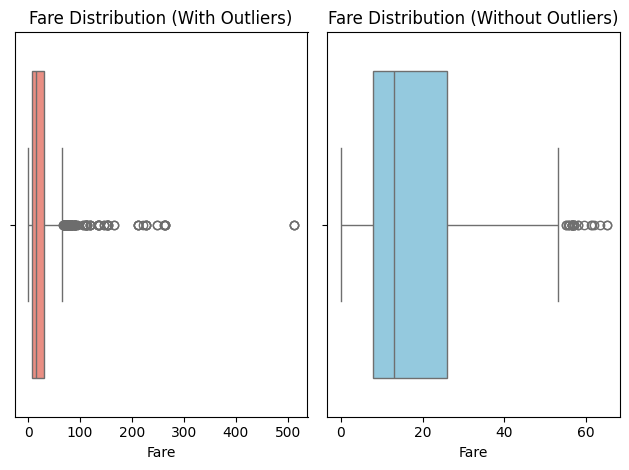

In [18]:
plt.subplot(1, 2, 1)
sns.boxplot(x=df['fare'], color='salmon')
plt.title('Fare Distribution (With Outliers)')
plt.xlabel('Fare')

# Cleaned data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_outlier['fare'], color='skyblue')
plt.title('Fare Distribution (Without Outliers)')
plt.xlabel('Fare')

plt.tight_layout()
plt.show()

## Variance

In [19]:
df_var = np.array([10,11,12,13,14,15])
var = np.var(df_var, ddof=1)
var

np.float64(3.5)

## standard deviation

In [20]:
df_std = np.array([10,11,12,13,14,15])
std = np.std(df_var, ddof=1)
std

np.float64(1.8708286933869707)

## Standard Error

In [21]:
df_var = np.array([10,11,12,13,14,15])
n = len(df_var)
std = np.std(df_var, ddof=1)
se = std/np.sqrt(n)
se

np.float64(0.7637626158259734)

## Distributions

<Axes: xlabel='age', ylabel='Count'>

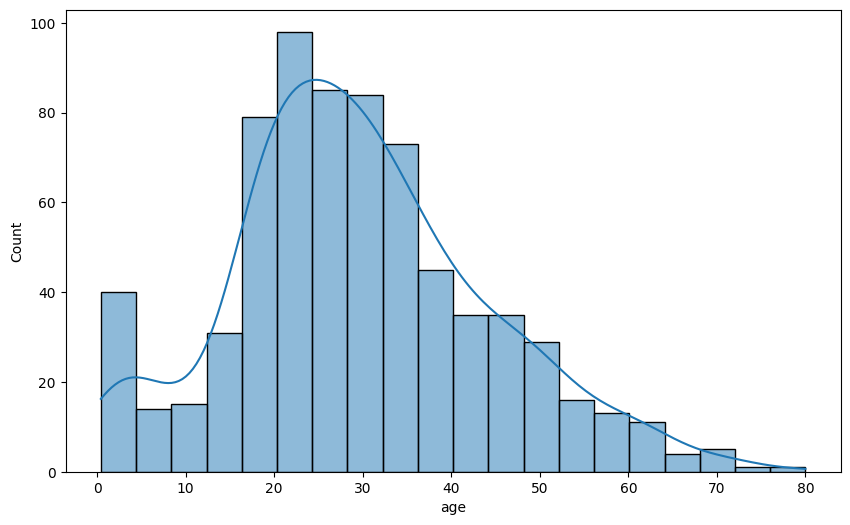

In [22]:
# Histplot
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='age',kde=True)

<Axes: xlabel='fare', ylabel='Count'>

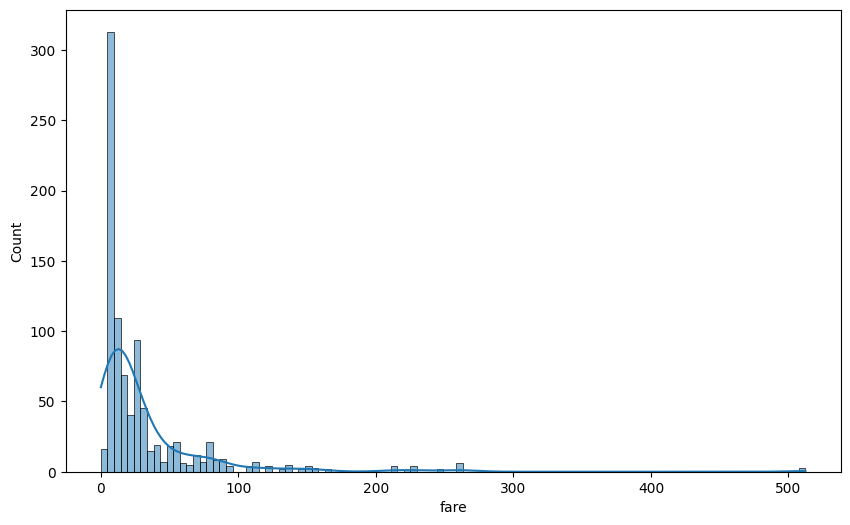

In [23]:
# Histplot
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='fare',kde=True)

## Kurtosis

In [24]:
stats.kurtosis(df['age'], fisher=False)

np.float64(nan)

In [25]:
stats.kurtosis(df['fare'],fisher=False)

np.float64(36.20428925264474)

## Skewness

In [26]:
stats.skew(df['fare'])

np.float64(4.7792532923723545)

In [27]:
stats .skew(df['age'])

np.float64(nan)

## Shapiro Test

In [28]:
stats.shapiro(df['fare'])

ShapiroResult(statistic=np.float64(0.5218913010396559), pvalue=np.float64(1.0840444395829658e-43))

## Chi-square Test

In [29]:
# Create a contigency table
contigency_table = pd.crosstab(df['sex'],df['survived'])
contigency_table

survived,0,1
sex,,
female,81,233
male,468,109


In [30]:
# chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)
print('Chi-square statistics: ',chi2)
print('p-value: ',p)
print('Degrees of freedom: ',dof)
print(f'Expected: \n{expected}')

Chi-square statistics:  260.71702016732104
p-value:  1.1973570627755645e-58
Degrees of freedom:  1
Expected: 
[[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


## Normal Distribution test

<Axes: xlabel='age', ylabel='Count'>

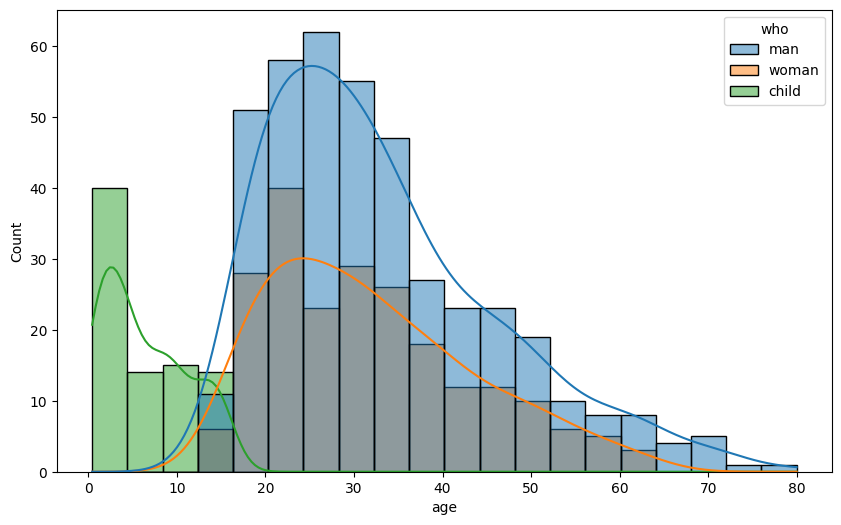

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='age',hue="who",kde=True)

#### shapiro wilk test on normal distribution

In [32]:
statistics, p = stats.shapiro(df['age'])

#printing the results using if else conditions

print(f"statistics: {statistics}")
print(f"p-value: {p}")
print("---"*15)

if  p > 0.05:
    print(f"p-value: {p}, sample looks gaussian/normally (fail to rejects H0)")
else:
    print(f"p-values: {p}, sample does not look gaussian/normally distributed (rejected)")

statistics: nan
p-value: nan
---------------------------------------------
p-values: nan, sample does not look gaussian/normally distributed (rejected)


In [33]:
statistics, p = stats.shapiro(df['fare'])

#printing the results using if else conditions

print(f"statistics: {statistics}")
print(f"p-value: {p}")
print("---"*15)

if  p > 0.05:
    print(f"p-value: {p}, sample looks gaussian/normally (fail to rejects H0)")
else:
    print(f"p-values: {p}, sample does not look gaussian/normally distributed (rejected)")

statistics: 0.5218913010396559
p-value: 1.0840444395829658e-43
---------------------------------------------
p-values: 1.0840444395829658e-43, sample does not look gaussian/normally distributed (rejected)


## T-test

#### one sample t-test

In [34]:
x = np.array([1,2,3,4,5])
mu = 3

# one sample t test
t_statistic, p = stats.ttest_1samp(x,mu)

print(f"t-statistics: {t_statistic}")
print(f"p-value: {p}")
print("---"*15)

if p > 0.05:
    print(f"p value: {p}, sample mean equal to the population mean (fail to reject)")
else:
    print(f"p-values: {p}, sample does not look gaussian/normally distributed (rejected)")    

t-statistics: 0.0
p-value: 1.0
---------------------------------------------
p value: 1.0, sample mean equal to the population mean (fail to reject)


#### Two sample t-test

In [35]:
group1 = [2.3,3.4,4.5,2.3,3.4]
group2 = [1.2,2.2,3.2,2.2,2.3]

#performing two sample t-test

t_stat, p = stats.ttest_ind(group1,group2)

print(f"t-statistics: {t_stat}")
print(f"p-value: {p}")
print("---"*15)

if p > 0.05:
    print(f"p value: {p}, group1 mean equal to group2 mean (fail to reject)")
else:
    print(f"p-values: {p}, group1 mean is not equal to group2 (rejected)")

t-statistics: 1.8482055087756457
p-value: 0.10175647371829195
---------------------------------------------
p value: 0.10175647371829195, group1 mean equal to group2 mean (fail to reject)


#### Paired sample t-test

In [36]:
before = [1,2,3,4,5]
after = [2,2,4,4,3]

#performing paired sample sample t-test
t_stat, p = stats.ttest_rel(before,after)

print(f"t-statistics: {t_stat}")
print(f"p-value: {p}")
print("---"*15)

if p > 0.05:
    print(f"p value: {p}, before mean is equal to after mean (fail to reject)")
else:
    print(f"p-values: {p}, before mean is not equal to after mean (rejected)")

t-statistics: 0.0
p-value: 1.0
---------------------------------------------
p value: 1.0, before mean is equal to after mean (fail to reject)


## Levene's test
test for homogeniety

In [37]:
group1 = [2.3,3.4,4.5,2.3,3.4]
group2 = [1.2,2.2,3.2,2.2,2.3]

#performing two sample t-test
stat, p = stats.levene(group1,group2)

print(f"statistics: {stat}")
print(f"p-value: {p}")
print("---"*15)

if p > 0.05:
    print(f"p value: {p}, variances are equal (fail to reject)")
else:
    print(f"p-values: {p}, variances are not equal (rejected)")

statistics: 0.44651162790697696
p-value: 0.5228039334796065
---------------------------------------------
p value: 0.5228039334796065, variances are equal (fail to reject)


## Bartlett's Test

In [38]:
group1 = [2.3,3.4,4.5,2.3,3.4]
group2 = [1.2,2.2,3.2,2.2,2.3]

#performing two sample t-test
stat, p = stats.bartlett(group1,group2)

print(f"statistics: {stat}")
print(f"p-value: {p}")
print("---"*15)

if p > 0.05:
    print(f"p value: {p}, variances are equal (fail to reject)")
else:
    print(f"p-values: {p}, variances are not equal (rejected)")

statistics: 0.24050679805097827
p-value: 0.6238403179343277
---------------------------------------------
p value: 0.6238403179343277, variances are equal (fail to reject)


## Anova

#### One way anova 

In [39]:
a = [2.2,3.4,4.3,5.6,2.1]
b = [10.2,9.9,7.1,5.9,3.7]
c = [32.2,33.24,24.3,15.6,12.1]

stat, p = stats.f_oneway(a,b,c)

print(f"statistics: {stat}")
print(f"p-value: {p}")
print("---"*15)

if p > 0.05:
    print(f"p value: {p}, mean are equal (fail to reject)")
else:
    print(f"p-values: {p}, mean are not equal (rejected)")

statistics: 16.739586738016907
p-value: 0.0003374520696886858
---------------------------------------------
p-values: 0.0003374520696886858, mean are not equal (rejected)


### One-Way ANOVA using statsmodels

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the OLS model
model = ols("fare ~ who", data=df).fit()

# Perform ANOVA (Type II)
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Interpret the p-value
p_value = anova_table["PR(>F)"]["who"]
if p_value < 0.05:
    print(f"Reject null hypothesis: the means are not equal (p-value = {p_value:.4f})")
else:
    print(f"Accept null hypothesis: no significant difference in means (p-value = {p_value:.4f})")

                sum_sq     df          F        PR(>F)
who       8.489291e+04    2.0  17.839152  2.535986e-08
Residual  2.112906e+06  888.0        NaN           NaN
Reject null hypothesis: the means are not equal (p-value = 0.0000)


## Two Way ANOVA

In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the OLS model
model = ols("fare ~ C(pclass) + C(who) + C(embark_town)", data=df).fit()

# Perform ANOVA (Type II)
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Example: Get p-value for the 'class' factor
p_value = anova_table.loc["C(pclass)", "PR(>F)"]

# Interpret the p-value
if p_value < 0.05:
    print(f"Reject null hypothesis: the means are not equal (p-value = {p_value:.4f})")
else:
    print(f"Fail to reject null hypothesis: no significant difference in means (p-value = {p_value:.4f})")


                      sum_sq     df           F        PR(>F)
C(pclass)       5.866386e+05    2.0  190.743869  1.441521e-69
C(who)          4.307607e+04    2.0   14.006062  1.027638e-06
C(embark_town)  1.917970e+04    2.0    6.236225  2.044621e-03
Residual        1.356309e+06  882.0         NaN           NaN
Reject null hypothesis: the means are not equal (p-value = 0.0000)


## Post hoc Anova

In [42]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(df['fare'],df['who'])
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 child    man  -7.9216 0.3535 -21.4279  5.5847  False
 child  woman  13.7849 0.0632  -0.5813 28.1512  False
   man  woman  21.7065    0.0  13.1736 30.2395   True
-----------------------------------------------------


## Pearson's Correlation Coefficient

In [43]:
def pearson(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_std = np.std(x)
    y_std = np.std(y)
    n = len(x)
    return sum((x-x_mean)*(y-y_mean))/(n* x_std * y_std)

# dataset  
x = np.array([1,2,3,4,5])
y = np.array([1,4,6,8,10])

print(f"Pearson correlation :{pearson(x,y)}")

# print with if else:
if pearson(x,y) < 0.6 > 0:
    print("Positive correlation")
elif pearson(x,y) > 0.6:
    print("Highly Positive Correlation")
elif pearson(x,y) > -0.6 < 0: 
    print("Negitive Correlation")
elif pearson(x,y) <-0.6:
    print("Highly Negitive Correlation")
else:
    print("No Correlation")

Pearson correlation :0.9958932064677039
Highly Positive Correlation


## SPearman's correlation cofficient

In [44]:
def spearman(x,y):
    x_rank = pd.Series(x).rank()
    y_rank = pd.Series(y).rank()
    return pearson(x_rank,y_rank)

x = [10, 20, 30, 40, 50]
y = [15, 25, 35, 45, 60]

print(f"Spearman correlation cofficient : {spearman(x,y)}")
    

Spearman correlation cofficient : 0.9999999999999998


## Other Method to computes correlation

In [48]:
# dataset  with numpy
x = np.array([1,2,3,4,5])
y = np.array([1,4,6,8,10])

pearson = np.corrcoef(x,y)

print(f"Pearson Correlation Coefficient: {pearson[0,1]}")

Pearson Correlation Coefficient: 0.9958932064677037


In [50]:
# dataset  with pandas

x = pd.Series([1, 2, 3, 4, 5])
y = pd.Series([1, 4, 6, 8, 10])

pearsonpd = x.corr(y)
print(f"Pearson Correlation (pandas): {pearsonpd:.4f}")

Pearson Correlation (pandas): 0.9959


In [51]:
# Create a DataFrame
df = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [1, 4, 6, 8, 10]
})

# Pearson correlation
pearson_corr = df.corr(method='pearson')

# Spearman correlation
spearman_corr = df.corr(method='spearman')

# Kendall correlation
kendall_corr = df.corr(method='kendall')

# Print results
print(" Pearson Correlation Matrix:\n", pearson_corr)
print("\n Spearman Correlation Matrix:\n", spearman_corr)
print("\n Kendall Correlation Matrix:\n", kendall_corr)

 Pearson Correlation Matrix:
           x         y
x  1.000000  0.995893
y  0.995893  1.000000

 Spearman Correlation Matrix:
      x    y
x  1.0  1.0
y  1.0  1.0

 Kendall Correlation Matrix:
      x    y
x  1.0  1.0
y  1.0  1.0
